![image](https://raw.githubusercontent.com/IBM/watson-machine-learning-samples/master/cloud/notebooks/headers/watsonx-Prompt_Lab-Notebook.png)
# Use watsonx, and `meta-llama/llama-3-2-11b-vision-instruct` model for image processing to generate a description of the IBM logo

#### Disclaimers

- Use only Projects and Spaces that are available in watsonx context.


## Notebook content

This notebook provides a detailed demonstration of the steps and code required to showcase support for Chat models.

Some familiarity with Python is helpful. This notebook uses Python 3.11.


## Learning goal

The purpose of this notebook is to demonstrate how to use watsonx.ai Chat models with images processing.


## Table of Contents

This notebook contains the following parts:

- [Setup](#setup)
- [Prepare the data image](#image)
- [Work with Foundation Models on watsonx](#models)
- [Use the chat to answer a question about the image](#predict)
- [Summary](#summary)

<a id="setup"></a>
## Set up the environment

Before you use the sample code in this notebook, you must perform the following setup tasks:

-  Create a <a href="https://cloud.ibm.com/catalog/services/watsonxai-runtime" target="_blank" rel="noopener no referrer">watsonx.ai Runtime Service</a> instance (a free plan is offered and information about how to create the instance can be found <a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/getting-started/wml-plans.html?context=wx&audience=wdp" target="_blank" rel="noopener no referrer">here</a>).

### Install and import the `datasets` and dependencies

In [ ]:
!pip install wget | tail -n 1
!pip install -U "ibm_watsonx_ai>=1.1.14" | tail -n 1

### Define the watsonx.ai credentials
Use the code cell below to define the watsonx.ai credentials that are required to work with watsonx Foundation Model inferencing.

**Action:** Provide the IBM Cloud user API key. For details, see <a href="https://cloud.ibm.com/docs/account?topic=account-userapikey&interface=ui" target="_blank" rel="noopener no referrer">Managing user API keys</a>.

In [2]:
import getpass
from ibm_watsonx_ai import Credentials

credentials = Credentials(
    url="https://us-south.ml.cloud.ibm.com",
    api_key=getpass.getpass("Enter your watsonx.ai api key and hit enter: "),
)

### Define the project ID
You need to provide the project ID to give the Foundation Model the context for the call. If you have a default project ID set in Watson Studio, the notebook obtains that project ID. Otherwise, you need to provide the project ID in the code cell below.

In [3]:
import os

try:
    project_id = os.environ["PROJECT_ID"]
except KeyError:
    project_id = input("Enter your project_id and hit enter: ")

<a id="image"></a>
## Data Image Preparation

Download the IBM logo.

In [3]:
import wget

filename = 'ibm_logo.jpg'
url = 'https://raw.github.com/IBM/watson-machine-learning-samples/master/cloud/data/logo/ibm_logo.jpg'

if not os.path.isfile(filename):
    wget.download(url, out=filename)

Display the downloaded image.

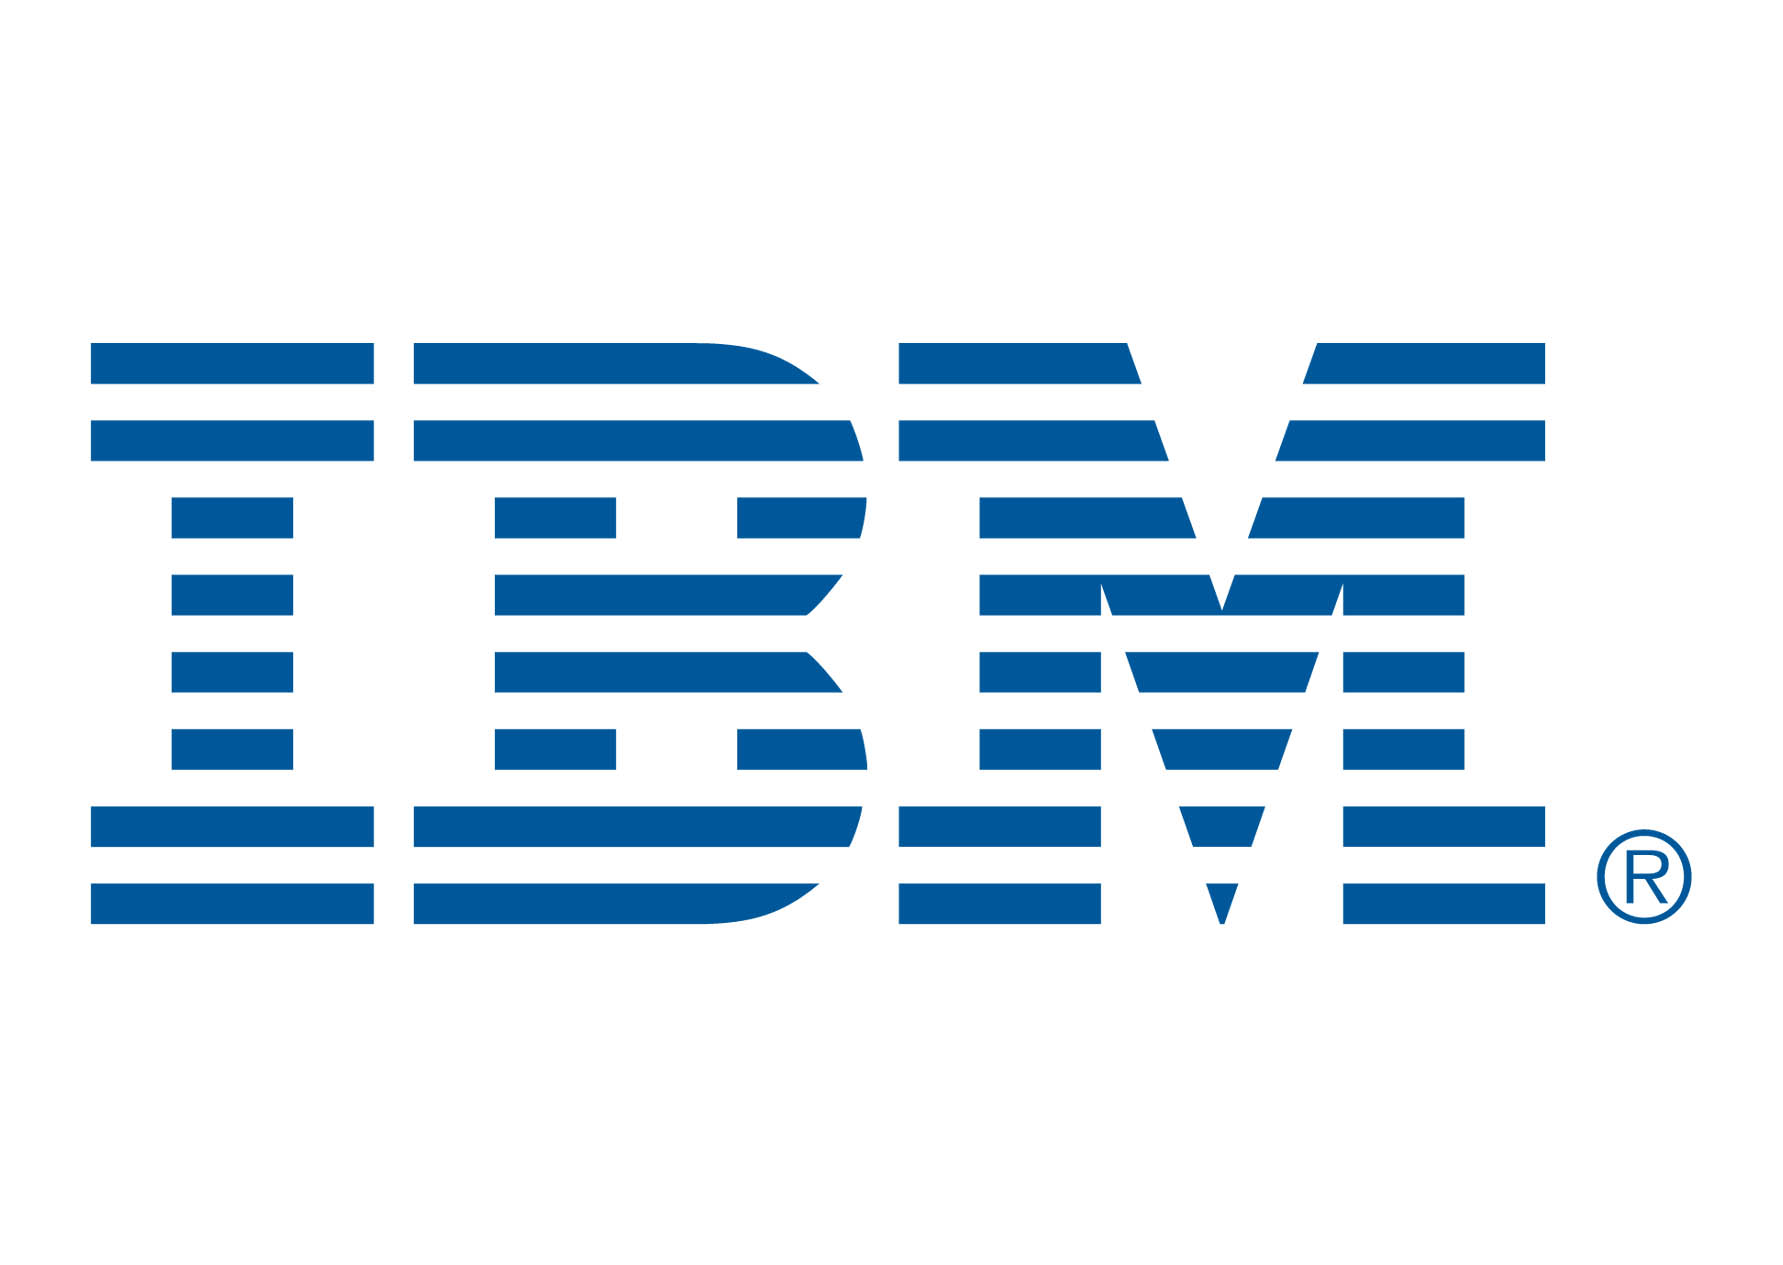

In [4]:
from IPython.display import Image

Image(filename=filename, width=600)

<a id="models"></a>
## Work with Foundation Models on `watsonx.ai`

Specify the `model_id` of the model you will use for the chat with image modalities.

In [5]:
model_id = "meta-llama/llama-3-2-11b-vision-instruct"

### Define the model parameters

You might need to adjust model `parameters` depending on the model you use.

In [6]:
from ibm_watsonx_ai.foundation_models.schema import TextChatParameters

TextChatParameters.show()

+-------------------+-----------------------------------------------------------------------------------+-------------------------+
| PARAMETER         | TYPE                                                                              | EXAMPLE VALUE           |
+===================+===================================================================================+=========================+
| frequency_penalty | float | None                                                                      | 0.5                     |
+-------------------+-----------------------------------------------------------------------------------+-------------------------+
| logprobs          | bool | None                                                                       | True                    |
+-------------------+-----------------------------------------------------------------------------------+-------------------------+
| top_logprobs      | int | None                                            

In [7]:
params = TextChatParameters(
    temperature=1
)

### Initialize the model

Initialize the `ModelInference` class with the previously set parameters.

In [8]:
from ibm_watsonx_ai.foundation_models import ModelInference

model = ModelInference(
    model_id=model_id,
    credentials=credentials,
    project_id=project_id,
    params=params
)

Encode the image to `base64.b64encode`.

In [9]:
import base64

with open(filename, 'rb') as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

<a id="predict"></a>
## Use the chat to answer a question about the provided image

Provide a question about the image and send it in the messages payload.

In [10]:
question = "Describe the image"

messages = [
  {
    "role": "user",
    "content": [
      {
        "type": "text",
        "text": question
      },
      {
        "type": "image_url",
        "image_url": {
          "url": "data:image/jpeg;base64," + encoded_string,
        }
      }
    ]
  }
]

Generate an answer to your question using the `meta-llama/llama-3-2-11b-vision-instruct` model.

In [11]:
response = model.chat(messages=messages)

Explore the generated content from the chat model.

In [12]:
print(response["choices"][0]["message"]["content"])

The image shows the IBM logo, which is a blue "IBM" in the IBM font, with a registered trademark symbol to the right of it. The logo is centered in the image and is on a white background.

* The logo is in the IBM font, which is a distinctive serif font designed for IBM in the 1950s by Paul Rand.
	+ The font is known for its bold and modern look, with large x-height and thick serifs.
	+ The font was originally designed for use on IBM logos and marketing materials, but it has since been used by other companies as well.
* The logo is blue, which is a color often associated with technology and innovation.
	+ Blue is also a color that is often associated with trust and stability, which are important values for a company like IBM.
	+ The blue color also helps the logo stand out against the white background and makes it more visible.
* The logo has a registered trademark symbol to the right of it, indicating that the logo is a protected trademark.
	+ The registered trademark symbol is a copy

Explore the output from the model.

In [13]:
response

{'id': 'chat-ad75f9724d6c410e8d8370a36e659bd1',
 'model_id': 'meta-llama/llama-3-2-11b-vision-instruct',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': 'The image shows the IBM logo, which is a blue "IBM" in the IBM font, with a registered trademark symbol to the right of it. The logo is centered in the image and is on a white background.\n\n* The logo is in the IBM font, which is a distinctive serif font designed for IBM in the 1950s by Paul Rand.\n\t+ The font is known for its bold and modern look, with large x-height and thick serifs.\n\t+ The font was originally designed for use on IBM logos and marketing materials, but it has since been used by other companies as well.\n* The logo is blue, which is a color often associated with technology and innovation.\n\t+ Blue is also a color that is often associated with trust and stability, which are important values for a company like IBM.\n\t+ The blue color also helps the logo stand out against the white back

<a id="summary"></a>
## Summary and next steps

You successfully completed this notebook!
 
You learned how to describe an image using `ModelInference`.
 
Check out our _<a href="https://ibm.github.io/watsonx-ai-python-sdk/samples.html" target="_blank" rel="noopener no referrer">Online Documentation</a>_ for more samples, tutorials, documentation, how-tos, and blog posts. 

### Author

**Mateusz Szewczyk**, Software Engineer at watsonx.ai.

Copyright © 2024-2025 IBM. This notebook and its source code are released under the terms of the MIT License.